<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana7/SistemasLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import axes3d

In [125]:
A = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])

In [126]:
U, S, VT = np.linalg.svd(A)

print("U =\n", U)      # Matriz ortogonal (columnas = vectores singulares izquierdos)
print("S =\n", S)      # Valores singulares (en un vector, ordenados de mayor a menor)
print("VT =\n", VT)    # Matriz ortogonal transpuesta (filas = vectores singulares derechos)

U =
 [[-0.18729746 -0.73188052 -0.65518742]
 [ 0.45624677  0.52586531 -0.71784717]
 [ 0.8699187  -0.4333781   0.23542489]]
S =
 [4.83808313 4.07697569 1.72372297]
VT =
 [[ 0.14917028  0.50142927  0.85224229]
 [-0.88012864  0.46016913 -0.11669595]
 [-0.45069036 -0.73267528  0.50996582]]


In [127]:
k = np.max(S)/np.min(S)
k

np.float64(2.806763738187218)

In [128]:
cond_2 = np.linalg.cond(A, 2)   # condición en norma 2
cond_1 = np.linalg.cond(A, 1)   # condición en norma 1
cond_inf = np.linalg.cond(A, np.inf)

print(cond_2, cond_1, cond_inf)

2.806763738187218 4.235294117647058 4.529411764705882


In [129]:
xsol = np.linalg.solve(A,b)
xsol

array([1., 1., 1.])

In [130]:
def GetZ(A,b,x,y,i):
    return (b[i] - A[i,0]*x - A[i,1]*y)/A[i,2]

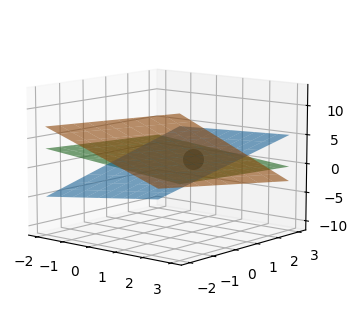

In [131]:
x = np.linspace(-2,3,10)
y = np.linspace(-2,3,10)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d', elev=10, azim = -50)

for i in range(3):
    ax.plot_surface(X,Y,GetZ(A,b,X,Y,i),alpha=0.6)

ax.scatter(xsol[0],xsol[1],xsol[2],color='k',s=200)

In [ ]:
import plotly.graph_objects as go

surfaces = []
for i in range(3):
    Z = GetZ(A, b, X, Y, i)
    surfaces.append(
        go.Surface(
            x=X, y=Y, z=Z,
            opacity=0.8,
            colorscale='Viridis',
            showscale=False,
            name=f"Plano {i+1}"
        )
    )

fig = go.Figure(data=surfaces)

point = go.Scatter3d(
    x=[xsol[0]], y=[xsol[1]], z=[xsol[2]],
    mode='markers+text',
    text=[f"sol: ({xsol[0]:.3f}, {xsol[1]:.3f}, {xsol[2]:.3f})"],
    textposition="top center",
    marker=dict(size=5),
    name="Solución"
)

fig.add_trace(point)
fig.show()